<a href="https://colab.research.google.com/github/GalaAldebara/PCVK_IqbalMakmur/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama : Muhammad Iqbal Makmur Al-Muniri
### Kelas : TI - 3H
### No : 16

## Tugas Praktikum

### 1. Buat Gamma Correction sesuai dengan petunjuk berikut

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Gamma Correction pada citra 
-----------------------------------
Masukkan nilai Gamma: 3


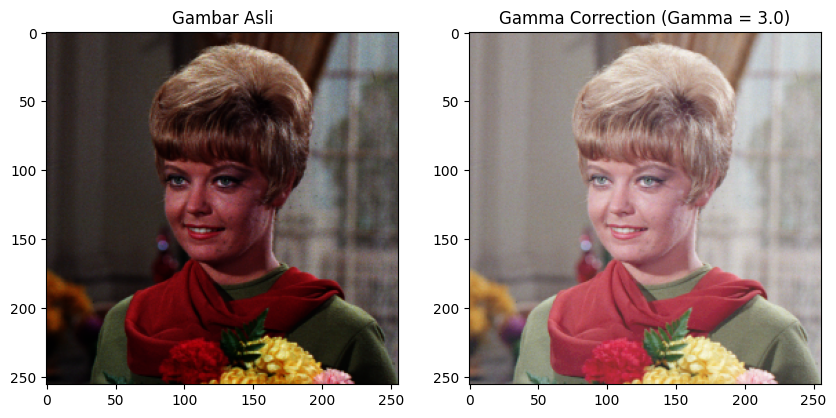

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

image_path = '/content/drive/MyDrive/Images/female.tiff'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print('Gamma Correction pada citra ')
print('-----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
    corrected_image = gamma_correction(image, gamma)

    corrected_image_rgb = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Gambar Asli')

    plt.subplot(1, 2, 2)
    plt.imshow(corrected_image_rgb)
    plt.title(f'Gamma Correction (Gamma = {gamma})')

    plt.show()

except ValueError:
    print('Error, not a number')


### **2. Buat Simulasi Image Depth**

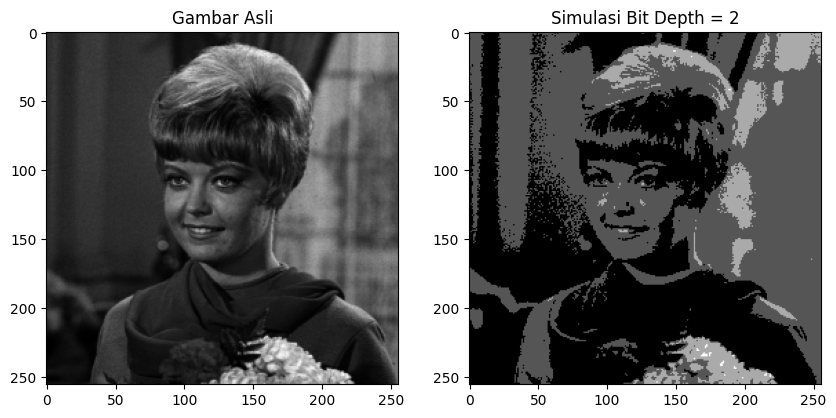

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

image_path = '/content/drive/MyDrive/Images/female.tiff'
original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

depth_image = np.zeros(original.shape, original.dtype)
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = round(original[i, j] / level) * level

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.title(f'Simulasi Bit Depth = {bit_depth}')

plt.show()


### **3. Buat modul Average Denoising**

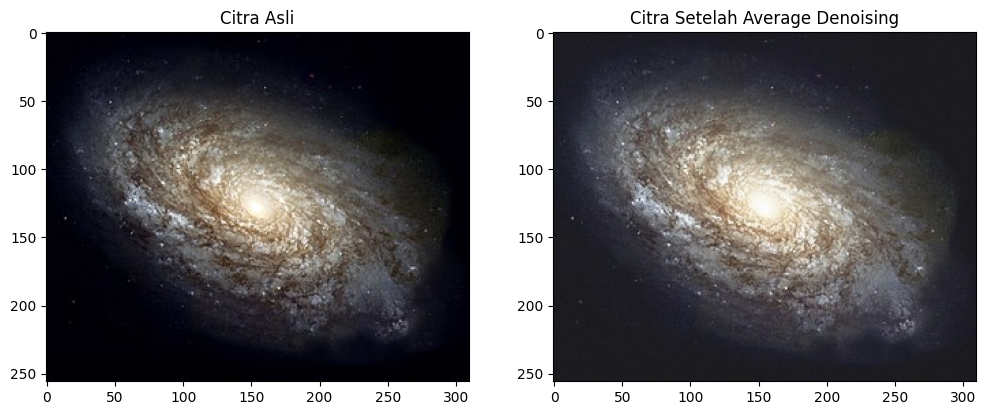

In [7]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

original_image_path = '/content/drive/MyDrive/Images/galaxy.jpg'
original_image = cv2.imread(original_image_path)

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

def average_denoising(images):
    average_image = np.mean(images, axis=0)
    return np.uint8(average_image)

denoised_image = average_denoising(cv_img)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Setelah Average Denoising')

plt.show()


In [5]:
# Fungsi untuk menghitung PSNR untuk beberapa jumlah citra
def calculate_psnr_for_multiple_images(original_image, max_images):
    psnr_values = []
    for count in [5, 10, 20, 40, 80]:
        cv_img_subset = cv_img[:count]
        denoised_image = average_denoising(cv_img_subset)
        psnr_value = psnr(original_image, denoised_image)
        psnr_values.append((count, psnr_value))
    return psnr_values

psnr_results = calculate_psnr_for_multiple_images(original_image, cv_img)
for count, psnr_value in psnr_results:
    print(f"Jumlah Citra di Average: {count}, Nilai PSNR: {psnr_value:.2f} dB")


Jumlah Citra di Average: 5, Nilai PSNR: 27.53 dB
Jumlah Citra di Average: 10, Nilai PSNR: 27.53 dB
Jumlah Citra di Average: 20, Nilai PSNR: 27.51 dB
Jumlah Citra di Average: 40, Nilai PSNR: 27.44 dB
Jumlah Citra di Average: 80, Nilai PSNR: 27.40 dB


#### Kesimpulannya adalah setelah mendapatkan nilai PSNR, PSNR cenderung meningkat seiring bertambahnya jumlah citra yang di-average. Sedangkan nilai PSNR yang lebih tinggi menunjukkan kualitas citra yang lebih baik setelah denoising.

### **4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:**

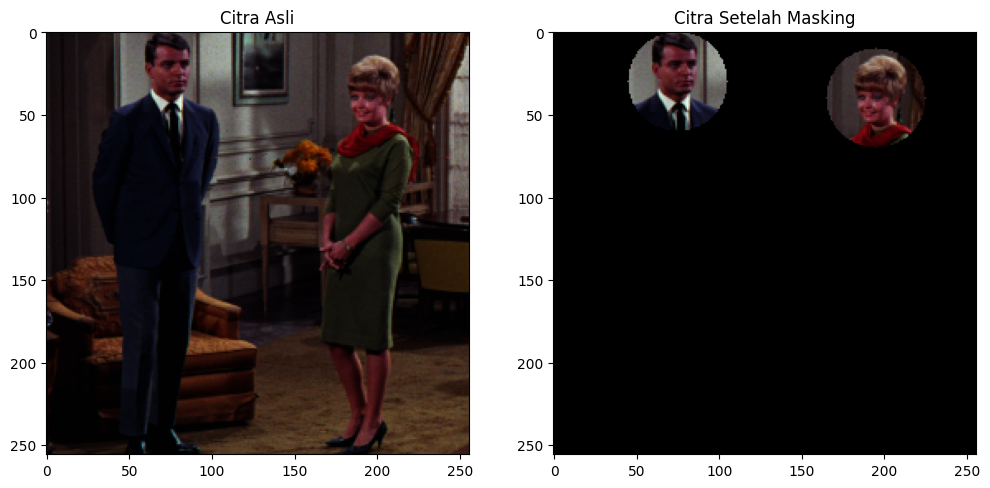

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Images/couple.tiff'
image = cv2.imread(image_path)

height, width, _ = image.shape

mask = np.zeros((height, width), dtype=np.uint8)

center1 = (75, 30)
radius1 = 30
cv2.circle(mask, center1, radius1, (255), -1)

center2 = (195, 40)
radius2 = 30
cv2.circle(mask, center2, radius2, (255), -1)

masked_image = cv2.bitwise_and(image, image, mask=mask)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Citra Setelah Masking')

plt.show()


### **5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.**

#### **NOT (komplemen)**

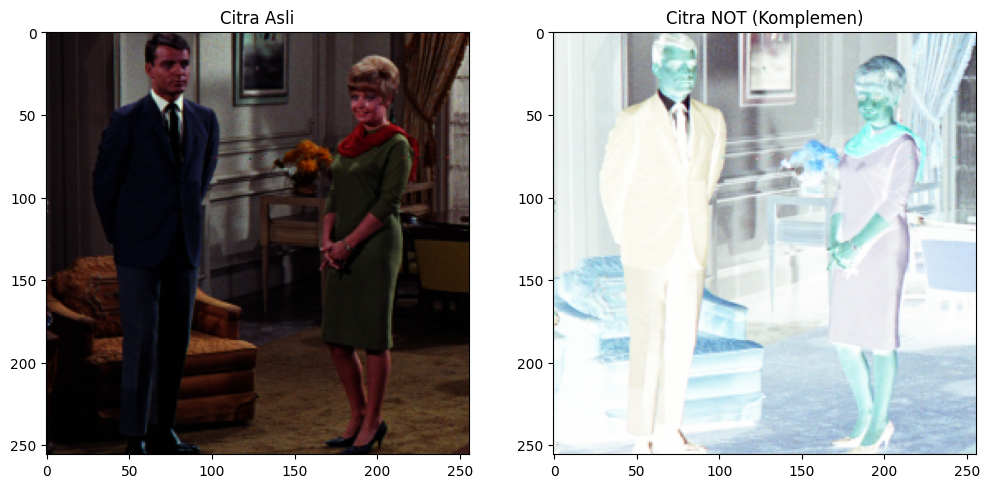

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Images/couple.tiff'
image = cv2.imread(image_path)

not_image = cv2.bitwise_not(image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(not_image, cv2.COLOR_BGR2RGB))
plt.title('Citra NOT (Komplemen)')

plt.show()


#### Operator NOT membalikkan nilai setiap piksel. Jika piksel berwarna hitam (0), maka akan menjadi putih 255, dan sebaliknya. jadi Operator NOT sangat berguna untuk meningkatkan kontras gambar.

#### **OR (Atau)**

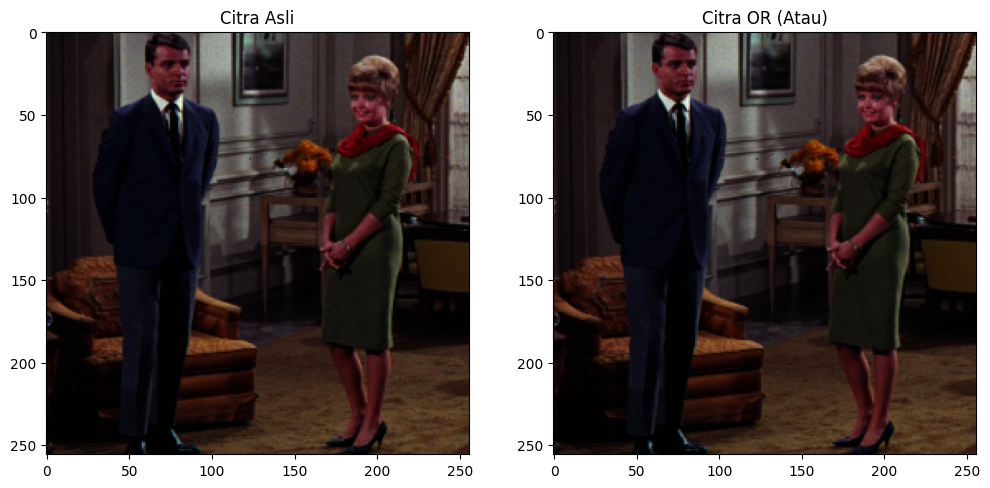

In [29]:
second_image_path = '/content/drive/MyDrive/Images/couple.tiff'
second_image = cv2.imread(second_image_path)

or_image = cv2.bitwise_or(image, second_image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(or_image, cv2.COLOR_BGR2RGB))
plt.title('Citra OR (Atau)')

plt.show()


#### Operator OR mengkombinasikan dua citra. Nilai piksel pada citra output akan menjadi 255 jika salah satu atau kedua citra memiliki nilai piksel 255. Berfungsi untuk memperlihatkan area yang paling terang dari kedua citra

#### **AND (Dan)**

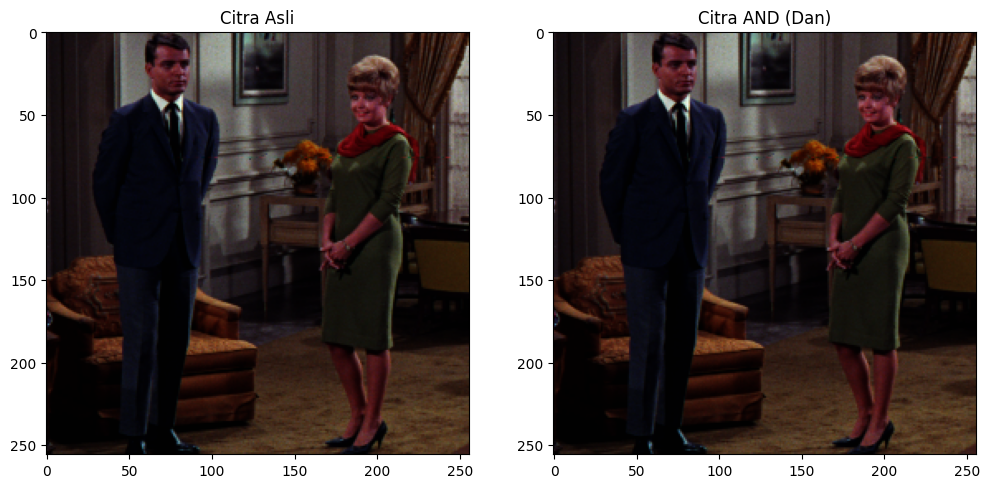

In [32]:
and_image = cv2.bitwise_and(image, second_image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(and_image, cv2.COLOR_BGR2RGB))
plt.title('Citra AND (Dan)')

plt.show()


AND (Dan) berfungsi untuk menghasilkan citra dengan area yang sama dari kedua citra. bertujuan atau berguna untuk mengidentifikasi overlap antara dua cotra.

#### **NAND (Not And)**

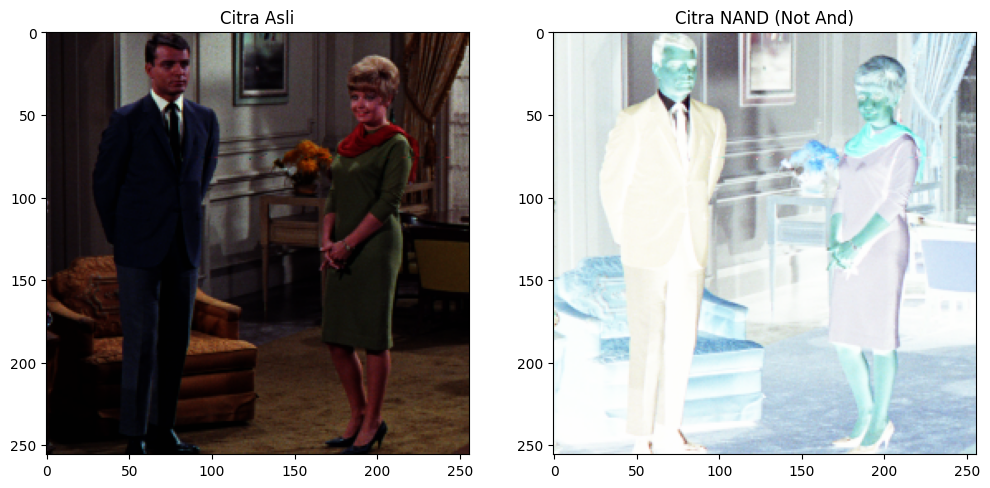

In [33]:
second_image_path = '/content/drive/MyDrive/Images/couple.tiff'
second_image = cv2.imread(second_image_path)

and_image = cv2.bitwise_and(image, second_image)

nand_image = cv2.bitwise_not(and_image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(nand_image, cv2.COLOR_BGR2RGB))
plt.title('Citra NAND (Not And)')

plt.show()


#### NAND menghasilkan citra yang menunjukkan area dimana kedua citra tidak memiliki nilai yang sama. ini

#### **XOR (Exclusive Or)**

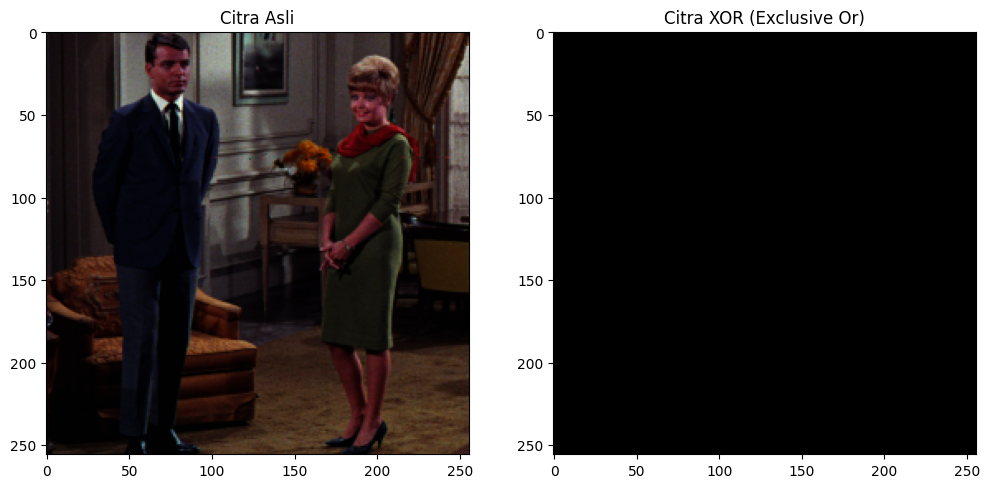

In [34]:
xor_image = cv2.bitwise_xor(image, second_image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(xor_image, cv2.COLOR_BGR2RGB))
plt.title('Citra XOR (Exclusive Or)')

plt.show()


#### XOR akan memberikan nilai true 1 jika dua nilai yang dibandingkan berbeda. contohnya jika gambar 1 berwarna piksel 1 (putih) dan gambar 2 berwarna piksel 2 (putih) maka akan menghasilkan putih XOR putih dengan hasil hitam (0)

## **Tugas**

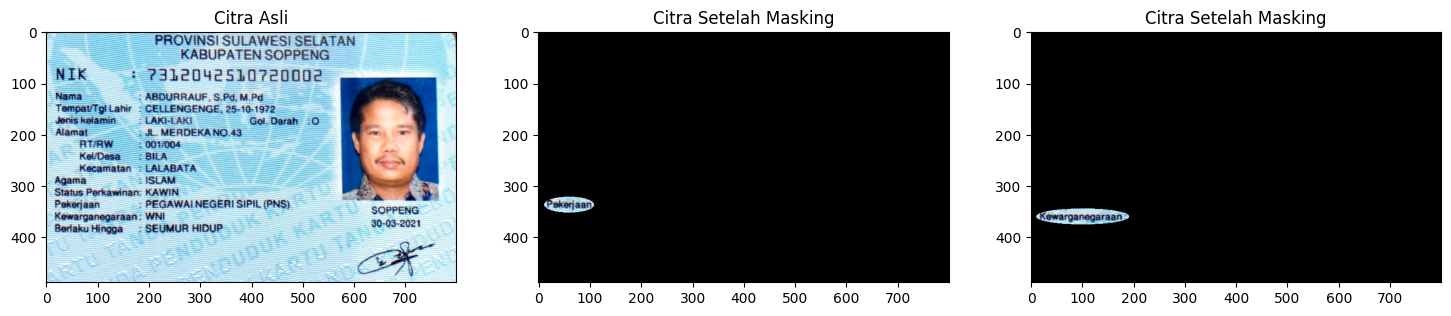

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Images/KTP.jpeg'
image = cv2.imread(image_path)

height, width, _ = image.shape


mask1 = np.zeros((height, width), dtype=np.uint8)
center1 = (60, 337)
axes1 = (48, 15)
cv2.ellipse(mask1, center1, axes1, 0, 0, 360, (255), -1)
masked_image1 = cv2.bitwise_and(image, image, mask=mask1)

mask2 = np.zeros((height, width), dtype=np.uint8)
center2 = (100, 360)
axes2 = (90, 15)
cv2.ellipse(mask2, center2, axes2, 0, 0, 360, (255), -1)
masked_image2 = cv2.bitwise_and(image, image, mask=mask2)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(masked_image1, cv2.COLOR_BGR2RGB))
plt.title('Citra Setelah Masking')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(masked_image2, cv2.COLOR_BGR2RGB))
plt.title('Citra Setelah Masking')

plt.show()
